# Example:

In [1]:
from bnn_trust_regions.model_evaluator import ModelEvaluator, UseAorB
from bnn_trust_regions.wasserstein_dist import WassersteinDistance
from bnn_trust_regions.gaussian import UnivariateGaussian
from bnn_trust_regions.io_data import IOData
from bnn_trust_regions.candidate_region_identification import IdentGifSettings, SisoCandidateRegionIdentification
from bnn_trust_regions.stat_test_settings import StatTestSettings

from bnn_trust_regions.utils import save_load

Load example Data

In [2]:
########################################################################################################
# load test data
########################################################################################################
# folder with some example data and predictions
data_folder = "example_data"
# load test data
test_data_file_name = "nn_test"
test_input, test_output = save_load.load_io_data(data_folder, test_data_file_name)
test_data = IOData(input=test_input, output=test_output)

# load training data
train_data_file_name = "nn_train"
train_input, train_output = save_load.load_io_data(data_folder, train_data_file_name)
train_data = IOData(input=train_input, output=train_output)

# load predictions
mcmc_file_name = "mcmc_test"
pred_mcmc = save_load.load_sampled_predictions(data_folder, mcmc_file_name)
svi_file_name = "meanfield_svi_test"
pred_svi = save_load.load_sampled_predictions(data_folder, svi_file_name)
pbp_file_name = "pbp_test"
pred_pbp_mean, pred_pbp_var = save_load.load_sampled_predictions(data_folder, pbp_file_name)
pred_pbp = UnivariateGaussian(mean=pred_pbp_mean, var=pred_pbp_var)

Settings and Hyperparameter

In [3]:
########################################################################################################
#  change predictions and test data and hyperparameters
# for region identification and statistical testing here
########################################################################################################
# evaluate predictions from mcmc and svi
pred_a = pred_mcmc  # mcmc as reference model
pred_b1 = pred_svi  # svi as approximation model

pred_b2 = pred_pbp  # pbp as approximation model

# set wasserstein distance settings
p_norm = 1
parallel_computing = True
verbose = False
ws_dist_settings1 = WassersteinDistance(
    p_norm=p_norm, parallel_computing=parallel_computing, verbose=verbose)


# candidate region identification settings
min_points_per_region = 200
smoothing_window_size = 50
plot_gif = True

# display gif of regions identification critical distance
plot_folder1 = "eval1_plots"
plot_folder2 = "eval2_plots"
file_name = "crit_dist"
dpi = 200
fps = 2
loop = 0  # 0 for infinite loop
gif_settings1 = IdentGifSettings(
    path=plot_folder1, file_name=file_name, dpi=dpi, fps=fps, loop=loop)
gif_settings2 = IdentGifSettings(
    path=plot_folder2, file_name=file_name, dpi=dpi, fps=fps, loop=loop)

region_ident1 = SisoCandidateRegionIdentification(
    min_points_per_region=min_points_per_region, smoothing_window_size=smoothing_window_size, verbose=plot_gif, gif_settings=gif_settings1)
region_ident2 = SisoCandidateRegionIdentification(
    min_points_per_region=min_points_per_region, smoothing_window_size=smoothing_window_size, verbose=plot_gif, gif_settings=gif_settings2)

# statistical test settings
alpha = 0.01  # significance level of 1%
confidence_interval = 0.95  # test the 95% confidence interval
stat_test_settings = StatTestSettings(alpha=alpha, confidence_interval=confidence_interval)

# test model A or B
use_a_or_b = UseAorB.A

Evaluate Model: SVI as approximation model

Binomial test results:
+-------+-------+-------------------+---------+-------------+--------------+------------------------+
| x_min | x_max | proportion inside | p-value | prop CI low | prop CI high | calibrated predictions |
+-------+-------+-------------------+---------+-------------+--------------+------------------------+
| -6.00 | -4.89 |        0.91       |   0.01  |     0.85    |     0.95     |          True          |
| -4.89 | -3.77 |        0.92       |   0.03  |     0.86    |     0.96     |          True          |
| -3.77 | -2.66 |        0.91       |   0.03  |     0.86    |     0.96     |          True          |
| -2.66 | -1.54 |        0.91       |   0.01  |     0.84    |     0.95     |         False          |
| -1.54 | -0.54 |        1.00       |   0.00  |     0.97    |     1.00     |         False          |
| -0.54 |  0.47 |        1.00       |   0.00  |     0.97    |     1.00     |         False          |
|  0.47 |  1.47 |        1.00       |   0.00  |     0.97   

/mnt/c/Users/be5831/Documents/SoftwareCampus/PythonProjects/BNN_trust_regions/bnn_trust_regions/plot_candidate_regions.py:160: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.axvspan(region.x_min, region.x_max, alpha=plt_settings.region_opacity,
/mnt/c/Users/be5831/Documents/SoftwareCampus/PythonProjects/BNN_trust_regions/bnn_trust_regions/plot_candidate_regions.py:156: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.axvspan(region.x_min, region.x_max, alpha=plt_settings.region_opacity,


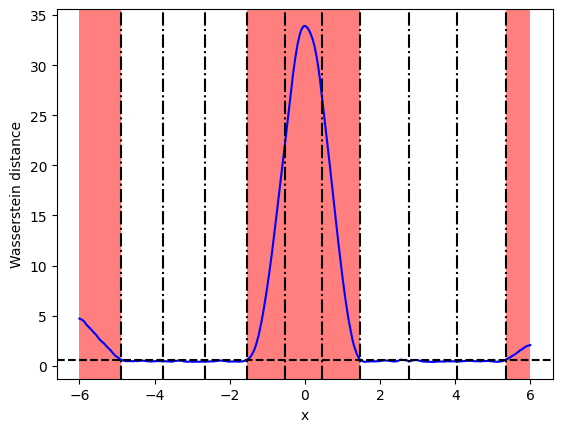

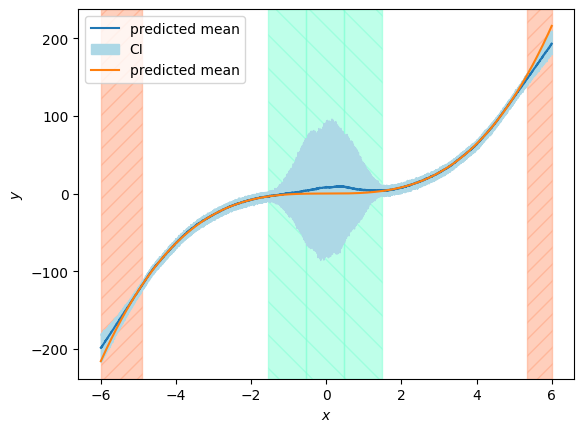

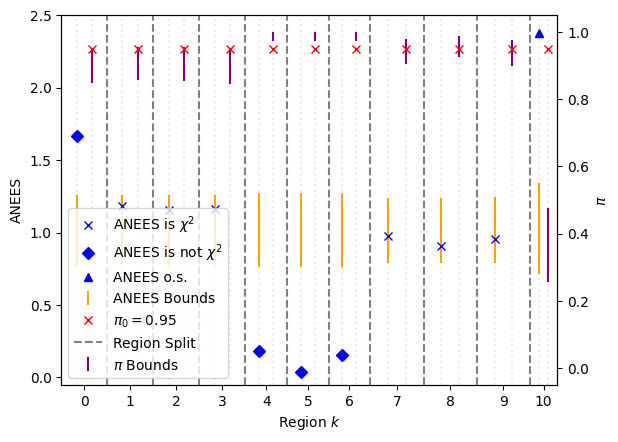

In [4]:
########################################################################################################
# evaluate predictions from mcmc and svi
########################################################################################################
model_evaluator1 = ModelEvaluator(
    predictions_a=pred_a, predictions_b=pred_b1, wasserstein_distance=ws_dist_settings1, test_data=test_data)

# wasserstein distance between reference and approximation model
model_evaluator1.calc_wasserstein_distance()

# calculate candidate regions and plot gif of critical distance
model_evaluator1.calc_canidate_regions(region_ident=region_ident1)
model_evaluator1.calc_statistical_tests(
    stat_test_settings=stat_test_settings, use_a_or_b=use_a_or_b)
model_evaluator1.print_statistical_tests()  # print results to console
model_evaluator1.plot_statistical_tests()  # plot candidate regions
########################################################################################################

Evaluate Model: PBP as approximation model

Binomial test results:
+-------+-------+-------------------+---------+-------------+--------------+------------------------+
| x_min | x_max | proportion inside | p-value | prop CI low | prop CI high | calibrated predictions |
+-------+-------+-------------------+---------+-------------+--------------+------------------------+
| -6.00 | -4.91 |        0.91       |   0.01  |     0.85    |     0.95     |         False          |
| -4.91 | -3.75 |        0.92       |   0.03  |     0.86    |     0.96     |          True          |
| -3.75 | -2.59 |        0.92       |   0.03  |     0.86    |     0.96     |          True          |
| -2.59 | -1.43 |        0.91       |   0.01  |     0.85    |     0.95     |         False          |
| -1.43 | -0.00 |        1.00       |   0.00  |     0.98    |     1.00     |         False          |
| -0.00 |  1.42 |        1.00       |   0.00  |     0.98    |     1.00     |         False          |
|  1.42 |  2.73 |        0.95       |   1.00  |     0.90   

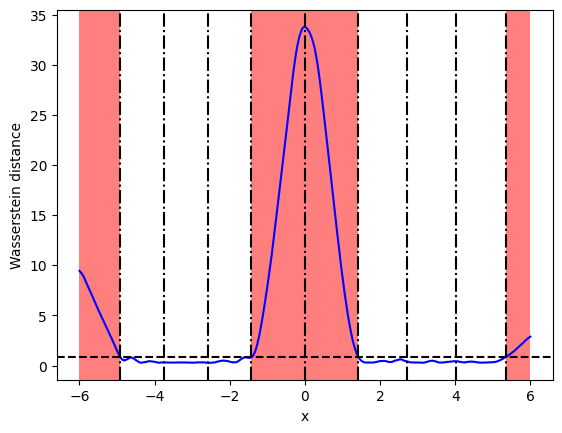

In [5]:
########################################################################################################
# evaluate predictions from mcmc and pbp
# mcmc as reference model
# pred_b2 = pred_pbp  # pbp as approximation model
########################################################################################################

model_evaluator2 = ModelEvaluator(
    predictions_a=pred_a, predictions_b=pred_b2, test_data=test_data)

model_evaluator2.set_distance_settings(ws_dist_settings1)
model_evaluator2.calc_wasserstein_distance()

model_evaluator2.calc_canidate_regions(region_ident=region_ident2)
model_evaluator2.calc_statistical_tests(
    stat_test_settings=stat_test_settings, use_a_or_b=use_a_or_b)
model_evaluator2.print_statistical_tests()  # print results to console
########################################################################################################